In [1]:
# Stock data
import quandl
import datetime
# Analyzing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Get Stock Data
df = quandl.get("WIKI/MSFT")
dates = df.index.tolist()

In [3]:
#df.to_csv("MFST_Stock.csv")
#df = read_csv("MFST_Stock.csv")

In [4]:
df = df[['Close']]

In [5]:
data_next_predict = 30
df.loc[:, 'GT'] = df.loc[:, 'Close'].shift(-data_next_predict)

In [6]:
from sklearn import preprocessing
X_org = df['Close'].values
y_org = df['GT'].values

X_org = preprocessing.scale(X_org)

In [7]:
forecast_pred_out = 60

X_forecast = X_org[-forecast_pred_out: -data_next_predict]
y_forecast = y_org[-forecast_pred_out: -data_next_predict]

In [8]:
X = X_org[: -forecast_pred_out]
y = y_org[: -forecast_pred_out]

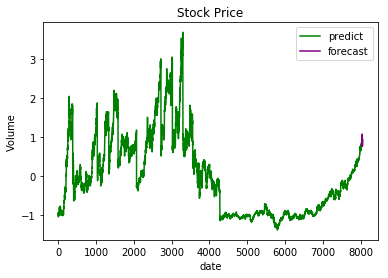

In [9]:
plt.plot(np.arange(len(X)), X, color = 'green')
plt.plot(np.arange(len(X), len(X)+len(X_forecast)), X_forecast, 'purple')
plt.title('Stock Price')
plt.xlabel('date')
plt.ylabel('Volume')
plt.legend(['predict','forecast'])

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle = True)

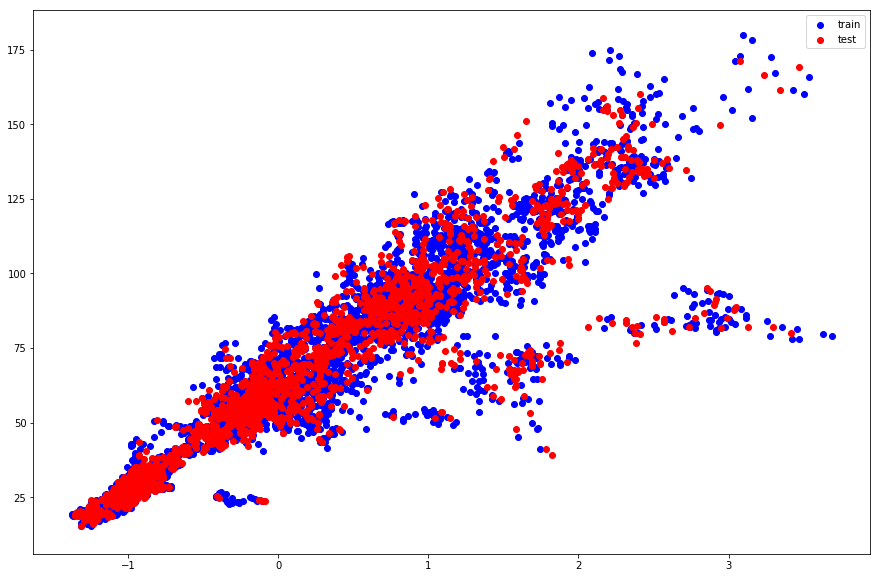

In [18]:
plt.figure(figsize=(15,10))
# scatter plot ความสัมพันธ์ของค่า X_train, y_train และ X_test, y_test
plt.scatter(X_train, y_train, marker='o', color='b')
plt.scatter(X_test, y_test, marker='o', color='r')
plt.legend(['train', 'test'])

In [12]:
#Prediction
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
seed = 2
k = 10
c = 1000
gmm = 0.1

In [13]:
kfold = model_selection.KFold(n_splits=k, shuffle = True, random_state=seed)

In [14]:
LRM = LinearRegression()
svr_lin = SVR(kernel = 'linear', C = c)
svr_rbf = SVR(kernel = 'rbf', C = c, gamma = gmm)
svr_poly = SVR(kernel = 'poly', C = c, degree = 3)

In [22]:
X_train = X_train.reshape(-1 ,1)
y_train = y_train.reshape(-1, 1)

In [38]:
score_LRM = model_selection.cross_val_score(LRM, X_train, y_train, cv=kfold)
score_lin = model_selection.cross_val_score(svr_lin, X_train, y_train, cv=kfold)
score_rbf = model_selection.cross_val_score(svr_rbf, X_train, y_train, cv=kfold)
score_poly = model_selection.cross_val_score(svr_poly, X_train, y_train, cv=kfold)

C:\Users\natht\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\natht\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\natht\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\natht\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\natht\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\natht\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\natht\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\natht\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to

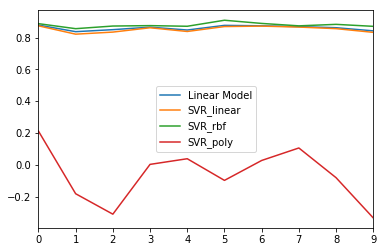

In [40]:
score_all = pd.DataFrame({'Linear Model':score_LRM,'SVR_linear':score_lin, 'SVR_rbf':score_rbf, 'SVR_poly': score_poly})
score_all.plot()

In [42]:
X_test = X_train.reshape(-1,1)
y_test = X_train.reshape(-1,1)

In [44]:
pred_LRM = LRM.fit(X_train, y_train).predict(X_test)
pred_lin = svr_lin.fit(X_train, y_train).predict(X_test)
pred_rbf = svr_rbf.fit(X_train, y_train).predict(X_test)
pred_poly = svr_poly.fit(X_train, y_train).predict(X_test)

C:\Users\natht\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\natht\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\natht\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\natht\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set

In [97]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
MSE_LRM = mean_squared_error(y_test, pred_LRM)
MSE_lin = mean_squared_error(y_test, pred_lin)
MSE_rbf = mean_squared_error(y_test, pred_rbf)
MSE_poly = mean_squared_error(y_test, pred_poly)

In [98]:
X_forecast = X_forecast.reshape(-1, 1)
y_forecast = y_forecast.reshape(-1, 1)

forecast_LRM = LRM.predict(X_forecast)
forecast_lin = svr_lin.predict(X_forecast)
forecast_rbf = svr_rbf.predict(X_forecast)
forecast_poly = svr_poly.predict(X_forecast)
forecast_result = [forecast_LRM, forecast_lin, forecast_rbf, forecast_poly]

In [101]:
MSE_cmp = []
acc_cmp = []
for i in forecast_result:
    MSE_cmp.append(mean_squared_error(y_forecast, i))

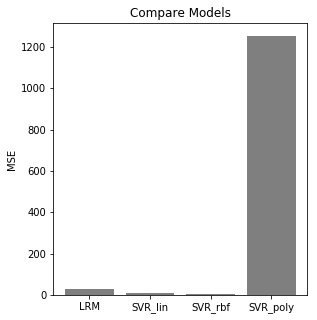

In [102]:
#compare Result
model_name = ['LRM', 'SVR_lin', 'SVR_rbf', 'SVR_poly']
y_pos = np.arange(len(model_name))

fig =  plt.figure(figsize = (10, 5))
fig.add_subplot(1,2,1)
plt.bar(y_pos, MSE_cmp, align='center', alpha=0.5, color = 'black')
plt.xticks(y_pos, model_name)
plt.ylabel('MSE')
plt.title('Compare Models')
plt.show()

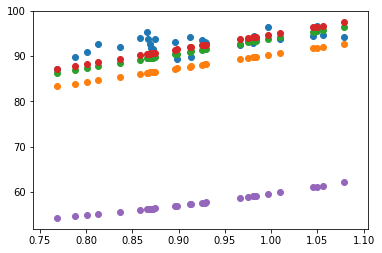

In [105]:
plt.scatter(X_forecast, y_forecast)
plt.scatter(X_forecast, forecast_LRM)
plt.scatter(X_forecast, forecast_lin)
plt.scatter(X_forecast, forecast_rbf)
plt.scatter(X_forecast, forecast_poly)

In [108]:
#Grid Search
from sklearn.model_selection import GridSearchCV

model = SVR()
parameters = {'kernel' : ['rbf'],
              'C': [0.1, 1.0, 10], 
              'gamma' : [0.1, 0.5, 1]}

grid_search = GridSearchCV(estimator = model, 
                           param_grid = parameters,
                           scoring = 'neg_mean_squared_error',
                           cv = kfold,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_parameter =  grid_search.best_params_
best_accuracy = grid_search.best_score_

C:\Users\natht\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [109]:
best_parameter

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [110]:
best_accuracy

-122.5206780572266